In [1]:
# Array manipulation
import numpy as np

# Data visualization
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Generate donut data

/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/quazar/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(-15.0, 15.0, -15.0, 15.0)

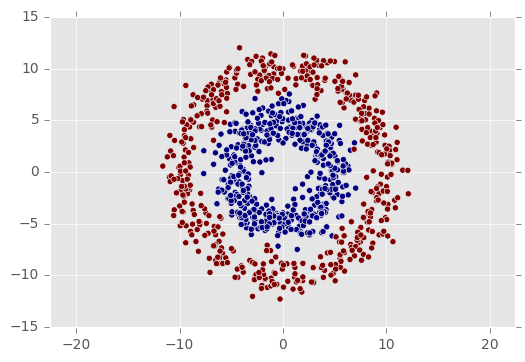

In [2]:
# Number of samples
n = 1000
# Number of features
d = 2

# Define radius of donuts
r_inner = 5
r_outter = 10

# Get points in polar cordinates
r1 = np.random.randn(n/2) + r_inner
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_inner = np.concatenate([[r1 * np.cos(theta)], [r1 * np.sin(theta)]]).T

# Get points in polar cordinates
r2 = np.random.randn(n/2) + r_outter
theta = 2 * np.pi * np.random.random(n/2)
# Transform to rectangular cordinates
X_outer = np.concatenate([[r2 * np.cos(theta)], [r2 * np.sin(theta)]]).T

# Join all points
X = np.concatenate([X_inner, X_outer])
# Outer circles have 1 as target
Y = np.zeros(X.shape[0])
Y[500:] = 1
# Place values of T on rows
Y = Y[:, np.newaxis]

# Plot points
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.axis('equal')

In [3]:
def visualize(W, b):
    x = np.arange(-15, 15.1, 0.1)
    y = np.arange(-15, 15.1, 0.1)
    xx, yy = np.meshgrid(x, y)
    pred_area = np.c_[xx.ravel(), yy.ravel()]
    
    # Calculate radius
    r = np.linalg.norm(pred_area, axis = 1)
    r = r.reshape(r.shape[0], -1)
    
    # Predict points and use the output layer
    pred = feed_foward(pred_area, W, b)[-1]
    #Take the most probable guess
    pred = np.round(pred)
    
    pred = pred.reshape(xx.shape)

    # Plot decision boundaries
    plt.pcolormesh(xx, yy, pred, cmap = 'seismic')

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c = Y)

    plt.xlim(-15, 15)
    plt.ylim(-15, 15)
    plt.show()
    
    return

# Sigmoid neural net

In [4]:
# Hyperparameters
n_neurons = [10, 10, 1]

In [5]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

In [6]:
def sigmoid_prime(a):
    return a * (1 - a)

In [7]:
# Create the network
current_input_shape = X.shape[1]

W = []
b = []
for layer_i, neurons_i in enumerate(n_neurons):
    # Create random weights and bias for every layer
    W.append(np.random.normal(scale=0.1 ,size=(current_input_shape, neurons_i)))
    b.append(np.zeros(neurons_i))
    # Update current input shape
    current_input_shape = neurons_i

In [8]:
def feed_foward(X, W, b):    
    current_input = X
    zs = []
    # Feed foward to the final layer
    for W_i, b_i in zip(W, b): 
        # Multiply input with weights and add bias
        z = current_input.dot(W_i) + b_i
        # Apply the sigmoid function
        z = sigmoid(z)        
        # Update current input
        current_input = z
        # Store layer
        zs.append(z)
        
    return zs

In [9]:
def deltas(a, W, Y):
    ds = []
    # Compute the delta for the output layer
    a_i = a[-1]
    d = sigmoid_prime(a_i) * (a_i - Y)
    ds.append(d)
    
    # Compute delta for hidden layers
    for i, a_i in enumerate(reversed(a[:-1])):
        d = sigmoid_prime(a_i) * ds[i].dot(W[-(i+1)].T)        
        ds.append(d)
        
    return [d for d in reversed(ds)]

In [10]:
def back_prop(W, X, pred, learning_rate):
    # The input X is the first layer of activations
    a = pred.copy()
    a.insert(0, X)
    # Calculate deltas
    ds = deltas(pred, W, Y)
    for W_i, a_i, d_i in zip(W, a[:-1], ds):
        W_i -= learning_rate * a_i.T.dot(d_i)
    
    return

In [11]:
def cross_entropy(T, Y):
    # If T = 0, fake_label = 1 - Y ; if T = 1, fake_label = Y
    fake_label = Y.copy()
    fake_label[T == 0] = 1 - fake_label[T == 0]    
  
    return -np.mean(np.log(fake_label))   

In [12]:
num_steps = 50001

Step: 0 | Cross entropy: 0.6933252557141582


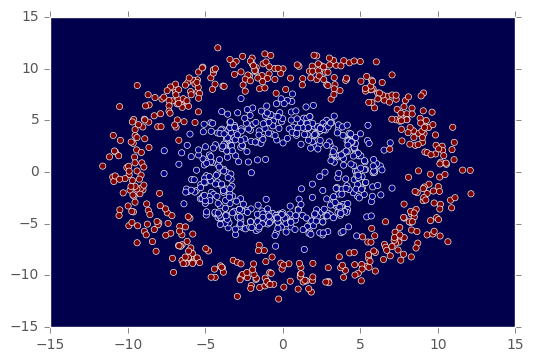

Step: 5000 | Cross entropy: 0.6922400123921463


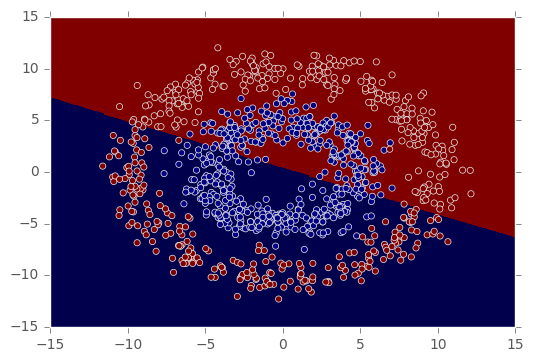

Step: 10000 | Cross entropy: 0.5070556704167793


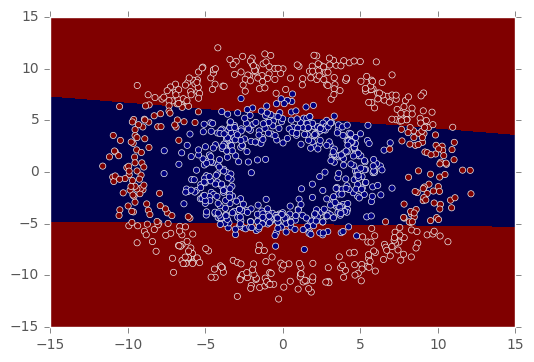

Step: 15000 | Cross entropy: 0.4811480829030327


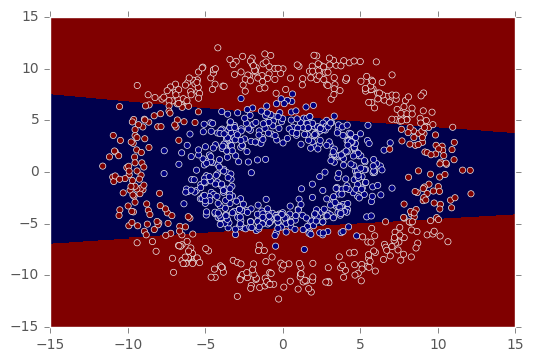

Step: 20000 | Cross entropy: 0.3524388610837296


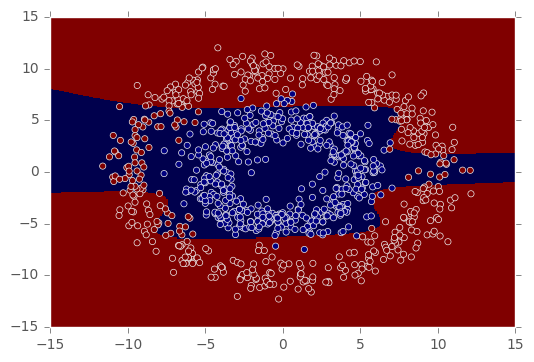

Step: 25000 | Cross entropy: 0.17087665271387217


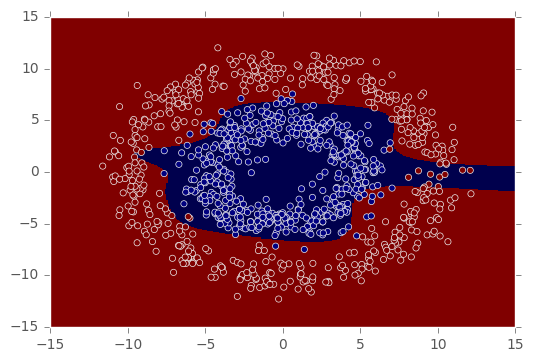

Step: 30000 | Cross entropy: 0.1359804868434947


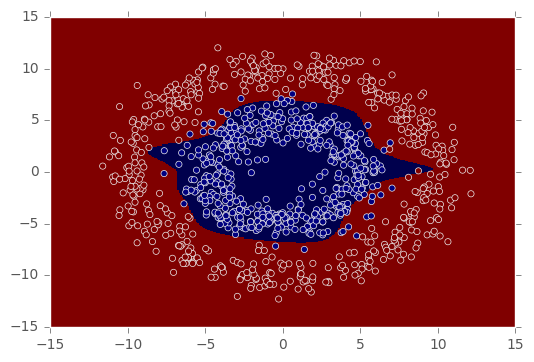

Step: 35000 | Cross entropy: 0.09350284241065757


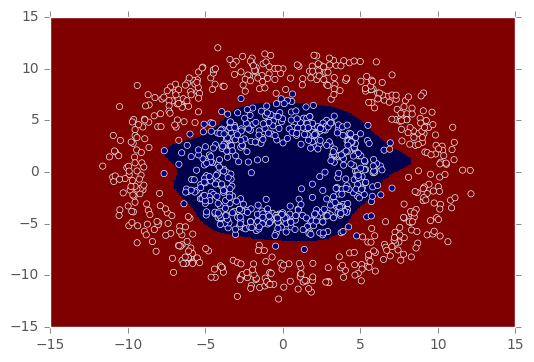

Step: 40000 | Cross entropy: 0.08641370880048273


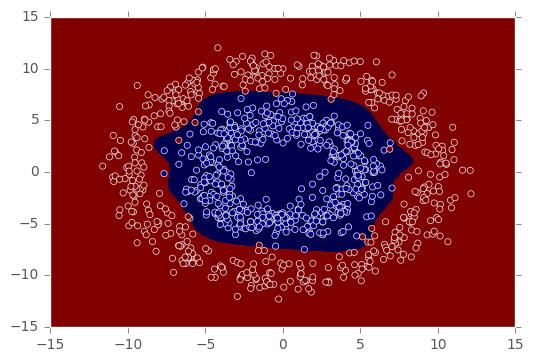

Step: 45000 | Cross entropy: 0.07048123684769611


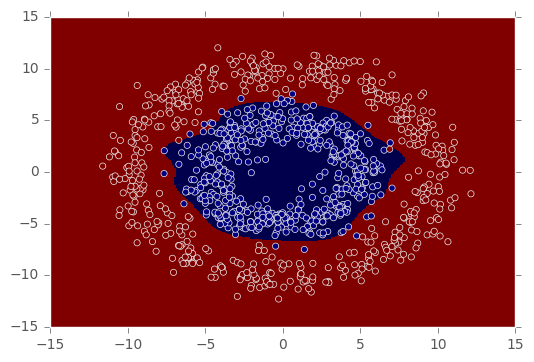

Step: 50000 | Cross entropy: 0.06331456675989461


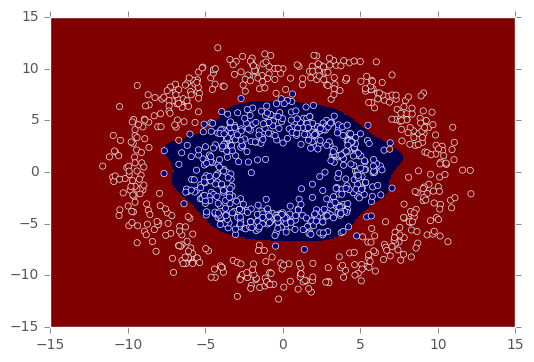

In [13]:
for step in range(num_steps): 
    # Calculate activations
    activations = feed_foward(X, W, b)  
    # Optimize        
    back_prop(W, X, activations, learning_rate=1e-3)
    
    cost = cross_entropy(Y, activations[2])    

    if step % 5000 == 0:
        print('Step: {0} | Cross entropy: {1}'.format(step, cost))
        visualize(W, b)